# GeoPy para identificar coordenadas a partir de location

## Importar librerías

Usando dataset ../../Data/02ParaLimpiar/02desastres_paralimpiar.csv

## Objetivo

### Implementar Geopy en forma reversa de como estábamos usando las coordenadas. Esta vez, de Location a coordenadas para ver si da resultados más exactos

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import ArcGIS
from geopy.geocoders import Nominatim
# geopy-python: librería para geocoding
# geocoders: lo mismo que geopy
# ArcGIS:Api para visualización GIS y análisis

## Cargar datos

In [10]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_paralimpiar.csv', encoding='utf-8', delimiter=';', engine='python')

# Verificar carga de dataset

##  Resumen básico shape, info, head

In [11]:
df.shape
# Resultado: 16636 filas y 20 columnas)

(16636, 26)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             16636 non-null  object 
 1   Year               16636 non-null  int64  
 2   Seq                16636 non-null  int64  
 3   Disaster Subgroup  16636 non-null  object 
 4   Disaster Type      16636 non-null  object 
 5   Disaster Subtype   13313 non-null  object 
 6   Country            16636 non-null  object 
 7   ISO                16636 non-null  object 
 8   Region             16636 non-null  object 
 9   Continent          16636 non-null  object 
 10  Location           14825 non-null  object 
 11  Origin             4085 non-null   object 
 12  Associated Dis     3593 non-null   object 
 13  Dis Mag Value      5064 non-null   float64
 14  Dis Mag Scale      15416 non-null  object 
 15  Latitude           2775 non-null   object 
 16  Longitude          277

In [13]:
df.head(1)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN


# Filtros para Location y geolocalización

In [17]:
# Categorías geográficas
geographical_data = df[['Location', 'ISO', 'Country', 'Region', 'Continent']]

# Categorías de magnitud
magnitude_data = df[['Dis Mag Scale', 'Dis Mag Value']]

# Categorías de geolocalización
geolocation_data = df[['Latitude', 'Longitude']]

# Categorías de fecha de Earthquake
datetime_data = df[['Start Day', 'Start Month', 'Start Year', 'End Day', 'End Month', 'End Year']]

# GeoPy

## Crear objeto de ArcGIS

In [6]:
nom=ArcGIS()

# Location a coordenadas

### Función get_geocode

Función para extraer la información de geolocalización para cada ubicación en su conjunto de datos.

In [26]:
def get_geocode(location):
    geolocator = Nominatim(user_agent = "MozillaFirefox", timeout=5)
    geocode = geolocator.geocode(location)
    
    if geocode is None:
        return None
    
    latitude = geocode.latitude
    longitude = geocode.longitude
    return latitude, longitude

In [27]:
df['Geocode'] = df['Location'].apply(get_geocode)

KeyboardInterrupt: 

Error:
GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Central%2C+North-West%2C+North-East%2C+West+regions&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

Indica que se agotó el tiempo de espera de la conexión al servicio de geocodificación de Nominatim, lo que impide que la solicitud de geocodificación se complete correctamente.

Este error puede ocurrir debido a varias razones, como problemas de conectividad de red o alta carga del servidor. Aquí hay algunos pasos que puede seguir para solucionar el problema:

* Vuelva a intentar la solicitud: a veces, el tiempo de espera puede ser un problema temporal. Puede intentar ejecutar el código nuevamente para ver si tiene éxito. Si se trata de un problema de red temporal, el intento posterior podría funcionar.

* Verifique su conexión a Internet: asegúrese de que su conexión a Internet sea estable y no experimente interrupciones. Puede intentar acceder a otros sitios web o servicios para verificar su conectividad.

* Verifique el estado del servicio de Nominatim: visite el sitio web de Nominatim o busque "Estado del servicio de Nominatim" en línea para verificar si hay interrupciones conocidas del servicio o actividades de mantenimiento que podrían estar causando el error de tiempo de espera. Si hay algún problema informado, es posible que deba esperar hasta que se resuelva.

* Aumente el valor de tiempo de espera: puede intentar aumentar el valor de tiempo de espera en su código para que la conexión tenga más tiempo para establecerse. Por ejemplo, puede establecer el parámetro de tiempo de espera del geolocalizador de Nominatim en un valor más alto, como timeout=5 (5 segundos). Ajuste el valor del tiempo de espera según sus necesidades específicas.

En caso de que funcionara, la columna "Geocode" contendrá tuplas con valores de latitud y longitud para cada ubicación. Si no se encuentra el código geográfico para una ubicación, contendrá None.

# Limpiar coordenadas

In [32]:
# # Limpiar valores de Latitude
# df['Latitude'] = df['Latitude'].str.replace('[NS]', '').str.strip()
# df['Latitude'] = df['Latitude'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# # Limpiar valores de Longitude
# df['Longitude'] = df['Longitude'].str.replace('[EW]', '').str.strip()
# df['Longitude'] = df['Longitude'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# # Convertir las columnas Latitude y Longitude a floats
# df['Latitude'] = df['Latitude'].astype(float)
# df['Longitude'] = df['Longitude'].astype(float)

# # Aplicar valores negativos donde Latitude y Longitude contengan S o W
# df.loc[df['Latitude'].str.contains('S'), 'Latitude'] *= -1
# df.loc[df['Longitude'].str.contains('W'), 'Longitude'] *= -1

# # Da error: AttributeError: Can only use .str accessor with string values!

AttributeError: Can only use .str accessor with string values!

In [33]:
# Limpiar valores de Latitude
df['Latitude'] = df['Latitude'].apply(lambda x: str(x).replace('[NS]', '').strip() if isinstance(x, str) else x)

# Limpiar valores de Longitude
df['Longitude'] = df['Longitude'].apply(lambda x: str(x).replace('[EW]', '').strip() if isinstance(x, str) else x)

# Convertir las columnas Latitude y Longitude a floats
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Aplicar valores negativos donde Latitude y Longitude contengan S o W
df.loc[df['Latitude'] < 0, 'Latitude'] *= -1
df.loc[df['Longitude'] < 0, 'Longitude'] *= -1


Método apply para aplicar una función lambda a cada valor en las columnas 'Latitude' y 'Longitude'. La función lambda comprueba si el valor es de tipo cadena (isinstance(x, str)). Si es así, realiza las operaciones de cadena para eliminar los indicadores direccionales. De lo contrario, devuelve el valor tal cual.

Después de limpiar los valores, se cnovierten las columnas 'Latitude' y 'Longitude' en flotantes como antes. Los valores negativos de latitud y longitud identificados por S o W se multiplican por -1 en las columnas correspondientes.

Al realizar estos cambios, el código debería poder manejar diferentes tipos de datos en las columnas 'Latitud' y 'Longitud' y realizar la limpieza y las conversiones necesarias.

## Verificar que las coordenadas son correctas

In [34]:
print(df.head())

          Dis No  Year   Seq Disaster Subgroup      Disaster Type  \
0  1900-9002-CPV  1900  9002    Climatological            Drought   
1  1900-9001-IND  1900  9001    Climatological            Drought   
2  1902-0012-GTM  1902    12       Geophysical         Earthquake   
3  1902-0003-GTM  1902     3       Geophysical  Volcanic activity   
4  1902-0010-GTM  1902    10       Geophysical  Volcanic activity   

  Disaster Subtype     Country  ISO           Region Continent  ... Longitude  \
0          Drought  Cabo Verde  CPV   Western Africa    Africa  ...       NaN   
1          Drought       India  IND    Southern Asia      Asia  ...       NaN   
2  Ground movement   Guatemala  GTM  Central America  Americas  ...      91.0   
3         Ash fall   Guatemala  GTM  Central America  Americas  ...       NaN   
4         Ash fall   Guatemala  GTM  Central America  Americas  ...       NaN   

  Start Year Start Month  Start Day End Year  End Month  End Day  \
0       1900         NaN      

In [36]:
print(df.dtypes)

Dis No                object
Year                   int64
Seq                    int64
Disaster Subgroup     object
Disaster Type         object
Disaster Subtype      object
Country               object
ISO                   object
Region                object
Continent             object
Location              object
Origin                object
Associated Dis        object
Dis Mag Value        float64
Dis Mag Scale         object
Latitude             float64
Longitude            float64
Start Year             int64
Start Month          float64
Start Day            float64
End Year               int64
End Month            float64
End Day              float64
Total Deaths         float64
Total Affected       float64
Total Damages Adj    float64
dtype: object


In [37]:
print(df['Latitude'].unique())
print(df['Longitude'].unique())

[   nan 14.    32.04  ... 38.424  4.326 36.159]
[    nan  91.     76.16  ... 143.159  36.034  69.881]


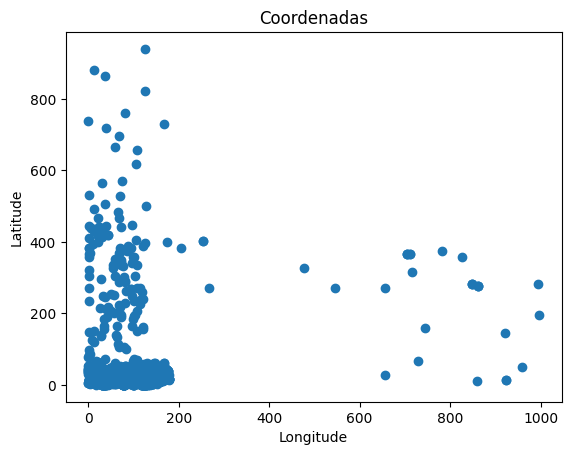

In [39]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordenadas')
plt.show()

# Coropleth map

## Importar geopandas, shapely.geometry y plotly

In [42]:
import geopandas as gpd
from shapely.geometry import Point
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Crear un GeoDataFrame a partir del DataFrame

In [44]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

### Crear un geojson

In [46]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

### Guardar geojson

In [47]:
gdf.to_file('coordenadas.geojson', driver='GeoJSON')

### Cargar el geojson

In [48]:
gdf = gpd.read_file('coordenadas.geojson')

### Mapa de coropletas para Magnitud

In [52]:
# Combinar 'Disaster Mag Scale' and 'Disaster Mag Value' en una columna compuesta
df['Magnitude'] = df['Dis Mag Scale'] + ' ' + df['Dis Mag Value'].astype(str)

# Crear GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Crear el choropleth usando la columna compuesta 'Magnitude'
fig = make_subplots(specs=[[{"type": "choropleth"}]])
fig.add_trace(
    go.Choroplethmapbox(
        geojson=gdf.geometry.__geo_interface__,
        locations=gdf.index,
        z=gdf['Magnitude'],
        colorscale='Viridis',
        marker_opacity=0.7,
        marker_line_width=0,
        featureidkey='properties.index',  # Specify the feature id key
        colorbar=dict(title='Magnitude')  # Specify the colorbar title
    )
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=2,
    mapbox_center={"lat": 0, "lon": 0}
)
fig.show()